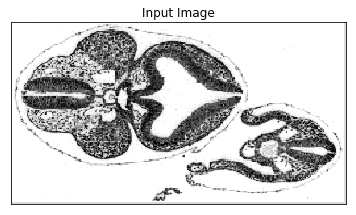

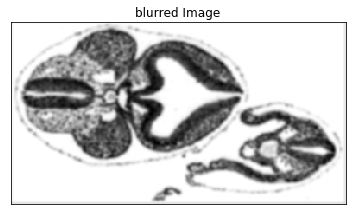

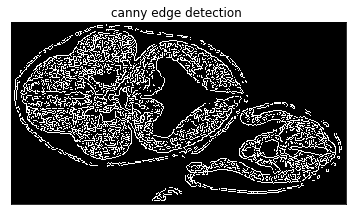

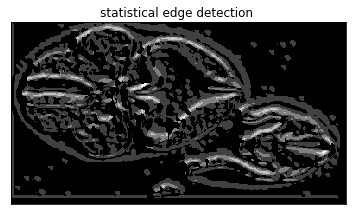

In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
imgg =cv2.imread('mouse.tif',0)#read image mouse 
img=cv2.GaussianBlur(imgg,(7,7),0)#gaussian filter to reduce noises 

plt.imshow(imgg, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()


plt.imshow(img, cmap = 'gray')
plt.title('blurred Image'), plt.xticks([]), plt.yticks([])
plt.show()

mask_zero= np.ones((7,7))#create 4 masks with 0 and 45 and 90 and 135 degree with 7*7 size
   #create mask zero
mask_zero= np.array([[1,1,1,1,1,1,1], [1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[0,0,0,0,0,0,0],[2,2,2,2,2,2,2],[2,2,2,2,2,2,2],[2,2,2,2,2,2,2]])
#create mask 90
mask_90= np.ones((7,7))   
mask_90= np.array([[1,1,1,0,2,2,2], [1,1,1,0,2,2,2],[1,1,1,0,2,2,2],[1,1,1,0,2,2,2],[1,1,1,0,2,2,2],[1,1,1,0,2,2,2],[1,1,1,0,2,2,2]])
#create mask 135
mask_135= np.ones((7,7))   
mask_135= np.array([[0,2,2,2,2,2,2], [1,0,2,2,2,2,2],[1,1,0,2,2,2,2],[1,1,1,0,2,2,2],[1,1,1,1,0,2,2],[1,1,1,1,1,0,2],[1,1,1,1,1,1,0]])
#create mask 45

mask_45= np.ones((7,7))   
mask_45= np.array([[1,1,1,1,1,1,0], [1,1,1,1,1,0,2],[1,1,1,1,0,2,2],[1,1,1,0,2,2,2],[1,1,0,2,2,2,2],[1,0,2,2,2,2,2],[0,2,2,2,2,2,2]])




def function_TTEST(A,B):#t test function and take two region 
    meanA=np.mean(A)#mean for region A
    meanB=np.mean(B)#mean for region B
    sub=meanA-meanB
    part_1=np.abs(sub)
    varA=np.var(A)
    varB=np.var(B)
    ll=21*varA+21*varB
    ss=21+21-2
    a=ll/ss
    ff=a*(21+21)
    oo=(21*21)
    yt=ff/oo
    part_2=yt**0.5
    Ttest=part_1/part_2#t test and return result 
    return Ttest





def function_FTEST(A,B): #function f test 
    varA=np.var(A) #compute variance for a and b
    varB=np.var(B)
    if varA<=1 and varB<=1:#threshold to take in minimum value of variance=1 
        varA=1
        varB=1
        divAB=(varA/varB)
        divBA=varB/varA #compute f test and return result


    elif varA<=1:
        varA=1
        divAB= float(varA/varB)
        divBA= float(varB/varA)
        

    elif varB<=1:
        varB=1
        divAB=float(varA/varB)
        divBA=float (varB/varA)
        
    else:    
        divAB=float(varA/varB)
        divBA=float(varB/varA)
        
    if divAB>divBA:#return the maximum result in  f test 
        maxc=divAB
    else:
        maxc=divBA
    return maxc   

rows, cols = img.shape
 




k = np.zeros(img.size, img.dtype).reshape(img.shape)
maskA = np.ones((49),np.uint8)#create array a to take the region of A
maskB = np.ones((48),np.uint8)#create array b to take rhe region of B

def function_reg(imm):#function reveives array with 7*7 size to find A and B regions
    REGION_A=[0]*49#create array a to take the region of A
    REGION_B=[0]*49#create array a to take the region of b
    c=0
    v=0
    for i in range(0,6):#find A and B region with mask zero 
        for j in range(0,6):
            if mask_zero[i,j]==1:
                REGION_A[c]=imm[i,j]
                c=c+1
                
            elif mask_zero[i,j]==2:
                REGION_B[v]=imm[i,j]
                v=v+1
            else: 
                continue
                    
                    
    t_test=function_TTEST(REGION_A,REGION_B)#send to t test and return result
    f_test=function_FTEST(REGION_A,REGION_B)# send to f test and return result
    
    
    
    if t_test>f_test:# return the maximum from it 
        p=t_test
        return p
        #immg_for_one_filter1[i,j]=p
        
    elif f_test>t_test:
        p=f_test
        return p
    
    
    
    
    
    
    
    
    
def function_reg1(imm):#just like the above but to 45 mask
    REGION_A=[0]*49
    REGION_B=[0]*49
    c=0
    v=0
    for i in range(0,6):
        for j in range(0,6):
            if mask_45[i,j]==1:
                REGION_A[c]=imm[i,j]
                c=c+1
                
            elif mask_45[i,j]==2:
                REGION_B[v]=imm[i,j]
                v=v+1
            else: 
                continue
                    
                    
    t_test=function_TTEST(REGION_A,REGION_B)
    f_test=function_FTEST(REGION_A,REGION_B)
    
    
    
    if t_test>f_test:
        p=t_test
        return p
        #immg_for_one_filter1[i,j]=p
        
    elif f_test>t_test:
        p=f_test
        return p
    
    
    
    
    
    
    
    
    
    
    
def function_reg2(imm):#just like the above but to 90 mask
    REGION_A=[0]*49
    REGION_B=[0]*49
    c=0
    v=0
    for i in range(0,6):
        for j in range(0,6):
            if  mask_90[i,j]==1:
                REGION_A[c]=imm[i,j]
                c=c+1
                
            elif mask_90[i,j]==2:
                REGION_B[v]=imm[i,j]
                v=v+1
            else: 
                continue
                    
                    
    t_test=function_TTEST(REGION_A,REGION_B)
    f_test=function_FTEST(REGION_A,REGION_B)
    
    
    
    if t_test>f_test:
        p=t_test
        return p
        
    elif f_test>t_test:
        p=f_test
        return p
    
    
    
    
    
    
    
    
def function_reg3(imm):#just like the above but to 135 mask
    REGION_A=[0]*49
    REGION_B=[0]*49
    c=0
    v=0
    for i in range(0,6):
        for j in range(0,6):
            if  mask_135[i,j]==1:
                REGION_A[c]=imm[i,j]
                c=c+1
                
            elif mask_135[i,j]==2:
                REGION_B[v]=imm[i,j]
                v=v+1
            else: 
                continue
                    
                    
    t_test=function_TTEST(REGION_A,REGION_B)
    f_test=function_FTEST(REGION_A,REGION_B)
    
    
    
    if t_test>f_test:
        p=t_test
        return p
        
    elif f_test>t_test:
        p=f_test
        return p
width=rows-7
height= cols-7
  ############################################################################################### 
             #section of all filters
        
  
    
imm= np.ones((7,7))#array to take the value of array inside the mask 
immr=np.ones((7,7))#function to result 
hp = np.zeros(img.size, img.dtype).reshape(img.shape)#crete mask with size of image 

###############################



        
        

for i in range(1, width):#for loop on all image
    for j in range(1,height ):
        imm=img[i:i+7,j:j+7]#value of image on mask
        
        res0 =function_reg(imm)#result from mask 0(max from t test and f test )
        res45=function_reg1(imm)#result from mask 45(max from t test and f test )
        res90 =function_reg2(imm)#result from mask 90(max from t test and f test )
        res135=function_reg3(imm)#result from mask 135(max from t test and f test )
        
        
        
        
        if (res0>res45 and res0>res90 and res0>res135):  #take the max value from the 4 mask 
            result=res0
            immr[3,3]=res0
            hp[i,j]=immr[3,3]
            

            
        
            
            equ = cv2.equalizeHist(hp)#histogram equalization on the image
            res = np.hstack((hp,equ))
            
        elif(res45>res0 and res0>res90  and res0>res135):
            result=res45
            
            immr[3,3]=res45
            hp[i,j]=immr[3,3]
            equ = cv2.equalizeHist(hp)
            res = np.hstack((hp,equ))
            
        elif(res90>res0 and res0>res45  and res0>res135):
            result=res90
          
            immr[3,3]=res90
            hp[i,j]=immr[3,3]
            equ = cv2.equalizeHist(hp)
            res = np.hstack((hp,equ))
            
        elif(res135>res0 and res0>res90  and res0>res45):
            result=res135
            immr[3,3]=res135
            hp[i,j]=immr[3,3]
      
            equ = cv2.equalizeHist(hp)
            res = np.hstack((hp,equ))
       


    
edges= cv2.Canny(imgg,100,200)#canny edge detection on the image
  

    
    
plt.imshow(edges, cmap = 'gray')#show canny 
plt.title('canny edge detection '), plt.xticks([]), plt.yticks([])
plt.show()  
            
plt.imshow(hp, cmap = 'gray')#show statistical
plt.title('statistical edge detection '), plt.xticks([]), plt.yticks([])
plt.show()            
            




        


    
    
        
